<a href="https://colab.research.google.com/github/namthuan2304/DM_2024/blob/main/Lab_2_1_21130556_%C4%90%E1%BA%B7ngNamThu%E1%BA%ADn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DM Lab 2: Preprocessing data**


*   MSSV: **21130556**
*   Ho ten: **Đặng Nam Thuận**



# Importing libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from pandas import get_dummies, concat

# Mount to drive

In [14]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Colab Notebooks/DM_Labs'
except ImportError as e:
    print('Cannot mount to your folder')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/DM_Labs


#**Task1**: Simple Preprocessing and Visualization

### 1.1 Load and display 10 first students in the dataset

In [28]:
students = pd.read_csv("students.csv")
students.head(10)

,Semester,Name,Course,Mark,Attended
0,FSS2010,Alex Krausche,Database Systems I,1.3,13
1,FSS2010,Tanja Becker,Database Systems I,2.0,12
2,FSS2010,Mariano Selina,Database Systems I,1.7,5
3,FSS2010,Otto Blacher,Database Systems I,2.3,13
4,FSS2010,Frank Fester,Database Systems I,2.0,13
5,FSS2010,Susanne Müller,Database Systems I,3.0,12
6,FSS2010,Avid Morvita,Database Systems I,4.0,13
7,FSS2010,Steve Queck,Database Systems I,2.7,8
8,FSS2010,Michaela Martke,Database Systems I,5.0,5
9,FSS2010,Ulrich Gester,Database Systems I,5.0,7


##1.2 What is the most common mark that has been given in FSS2010 (using histogram)?


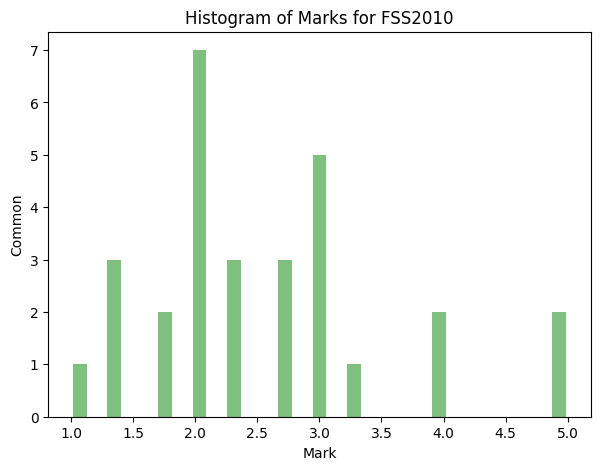

In [13]:
fss2010 = students[students['Semester']=='FSS2010']
plt.figure(figsize=(7, 5))
plt.hist(fss2010['Mark'], bins=len(fss2010['Mark']), color='green', histtype='bar', alpha=0.5, rwidth=0.8)
plt.title('Histogram of Marks for FSS2010')
plt.xlabel('Mark')
plt.ylabel('Common')
plt.show()

#1.3. Plot the correlation between attributes in the dataset

> **Syntax**: *df.corr(method, min_periods,numeric_only)*

*  **method**: In method we can choose any one from {'pearson', 'kendall', 'spearman'} pearson is the standard correlation coefficient matrix i.e default
*  **min_periods**: int This is optional. Defines th eminimum number of observations required per pair.
*  **numeric_only**: Default is False, Defines we want to compare only numeric or categorical object also

In [ ]:
def mylabelEncoder(data, columns):
  le = LabelEncoder()
  for i in columns:
    data[i] = le.fit_transform(data[i])
  return data

In [ ]:
le_data = mylabelEncoder(students, students.columns)
correlation_matrix = le_data.corr()
correlation_matrix

,Semester,Name,Course,Mark,Attended
Semester,1.000000,0.019476,-0.490985,0.056922,-0.014694
Name,0.019476,1.000000,-0.046974,0.438497,-0.142765
Course,-0.490985,-0.046974,1.000000,-0.159441,0.001369
Mark,0.056922,0.438497,-0.159441,1.000000,-0.274628
Attended,-0.014694,-0.142765,0.001369,-0.274628,1.000000


##1.3. Is there a correlation between the **mark** and the **number of attended classes**?

*   Find the answer using a scatter plot




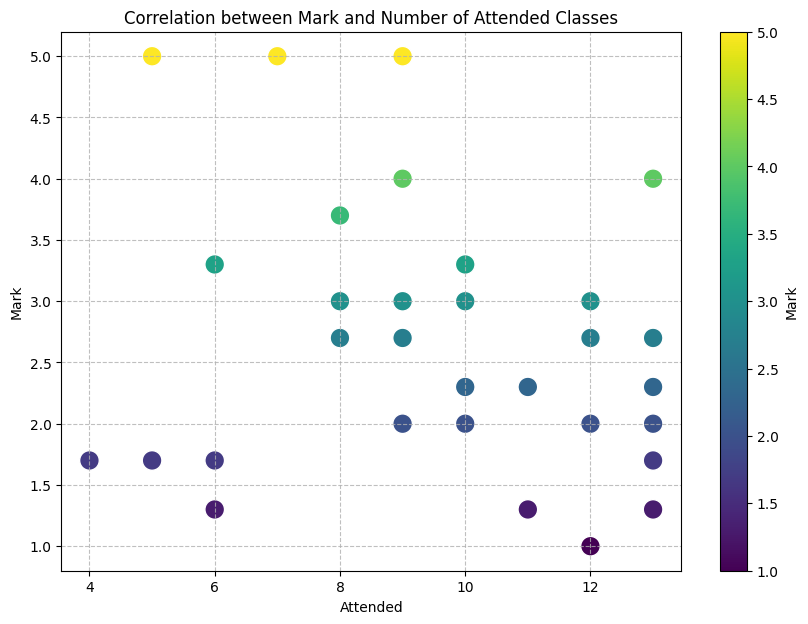

In [16]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(students['Attended'], students['Mark'], s=200, c=students['Mark'], cmap='viridis', edgecolor='white')
cbar = plt.colorbar(scatter)
cbar.set_label('Mark')
plt.title('Correlation between Mark and Number of Attended Classes')
plt.xlabel('Attended')
plt.ylabel('Mark')
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

##1.4. Whether the correlation is held for all students (**hint**: use a scatter plot).

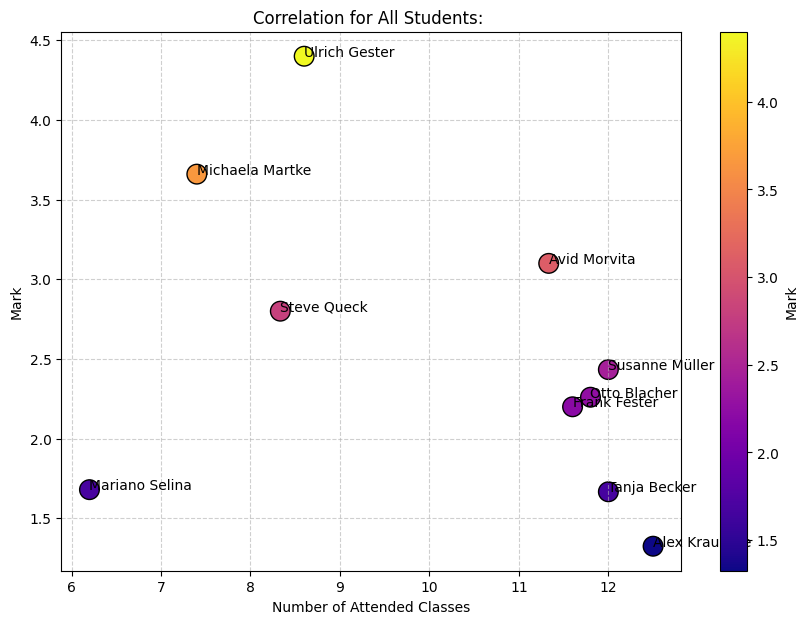

In [18]:
data_group = students.groupby('Name').mean(numeric_only=True)
data_group.head()

plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_group['Attended'], data_group['Mark'], s=200, c=data_group['Mark'], cmap='plasma', edgecolor='black')
cbar = plt.colorbar(scatter)
cbar.set_label('Mark')
plt.title('Correlation for All Students: ')
plt.xlabel('Number of Attended Classes')
plt.ylabel('Mark')
plt.grid(True, linestyle='--', alpha=0.6)

for(name, mark, attended) in data_group.itertuples():
  plt.annotate(name, (attended, mark))
plt.show()


#**Task 2**. With Iris dataset

##2.1 Load iris dataset
The dataset describes three types of Iris flowers:
- Setosa
- Virginica
- Versicolour

There are four (non-class) attributes
- Sepal width and length
- Petal width and length

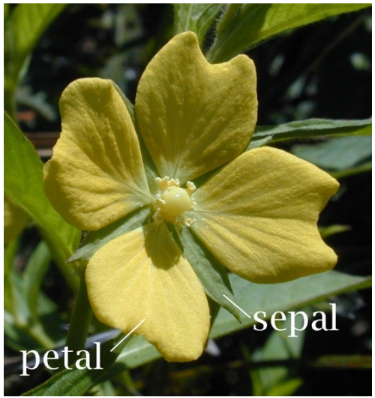

In [19]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Task 2.2. Use scatter plot to visualise and find out the best combination two features in classifing different types of iris flowers?
**Combinations**:


*   ['SepalLength', 'SepalWidth']
*   ['PetalLength', 'PetalWidth']
*   ['SepalLength','PetalLength']
*   ['SepalLength','PetalWidth']
*   ['SepalWidth', 'PetalWidth']
*   ['SepalWidth','PetalLength']



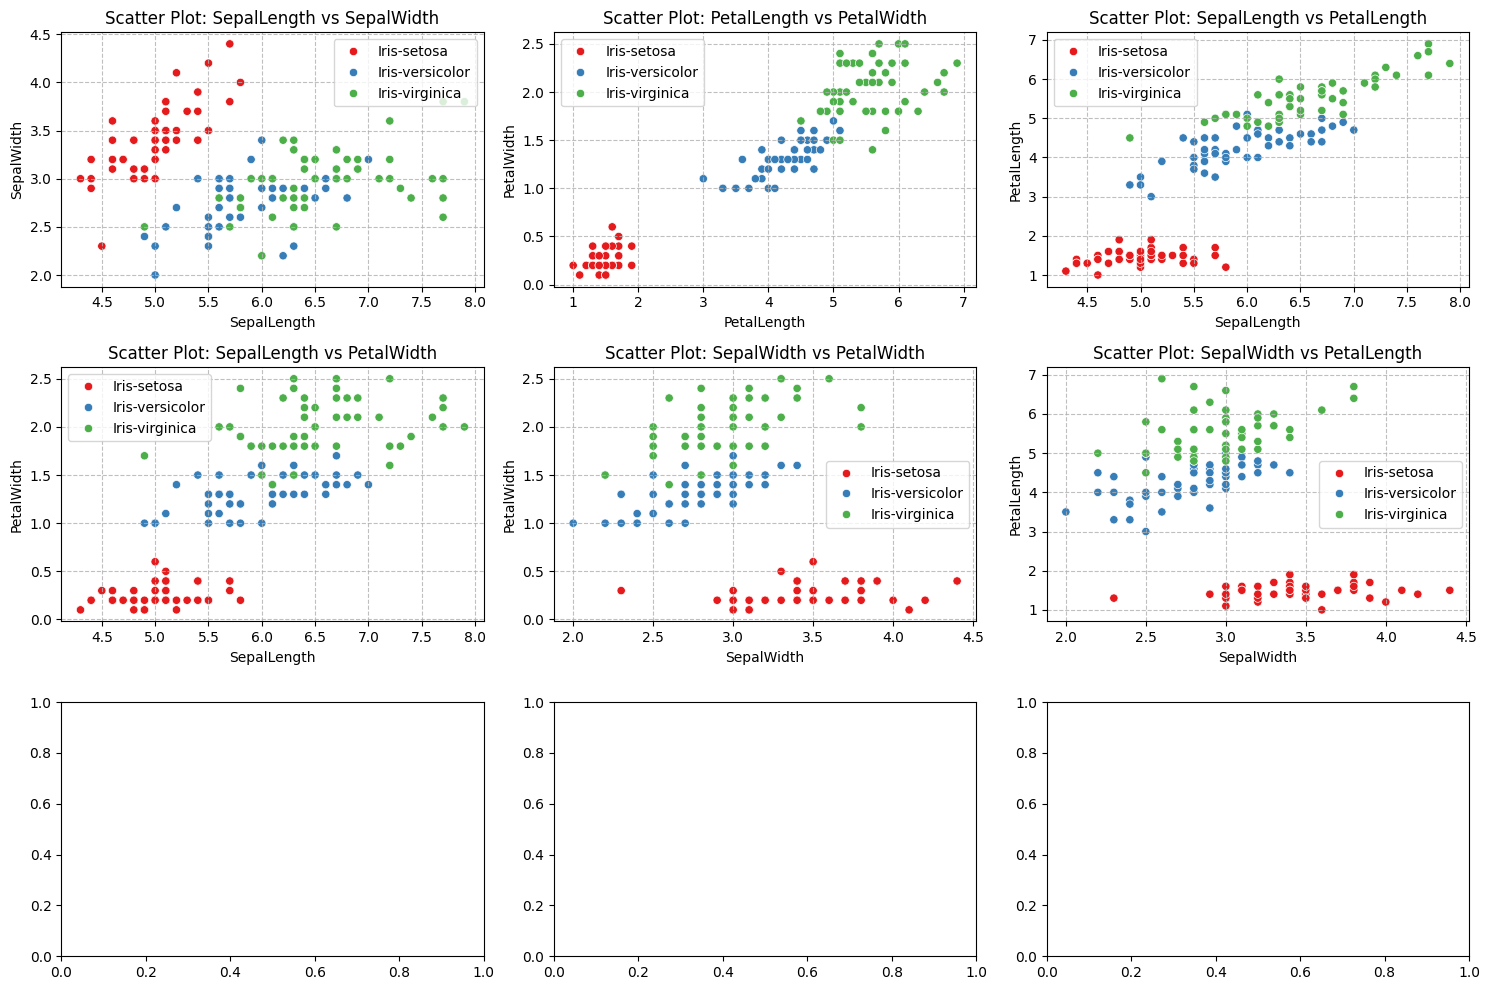

In [44]:
combinations = [
    ['SepalLength', 'SepalWidth'],
    ['PetalLength', 'PetalWidth'],
    ['SepalLength', 'PetalLength'],
    ['SepalLength', 'PetalWidth'],
    ['SepalWidth', 'PetalWidth'],
    ['SepalWidth', 'PetalLength']
]
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Loop through combinations and create scatter plots
for (i, combination), ax in zip(enumerate(combinations), axes.ravel()):
    sns.scatterplot(x=combination[0], y=combination[1], hue='Name', palette='Set1', data=iris, ax=ax)
    ax.set_title(f'Scatter Plot: {combination[0]} vs {combination[1]}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.8)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

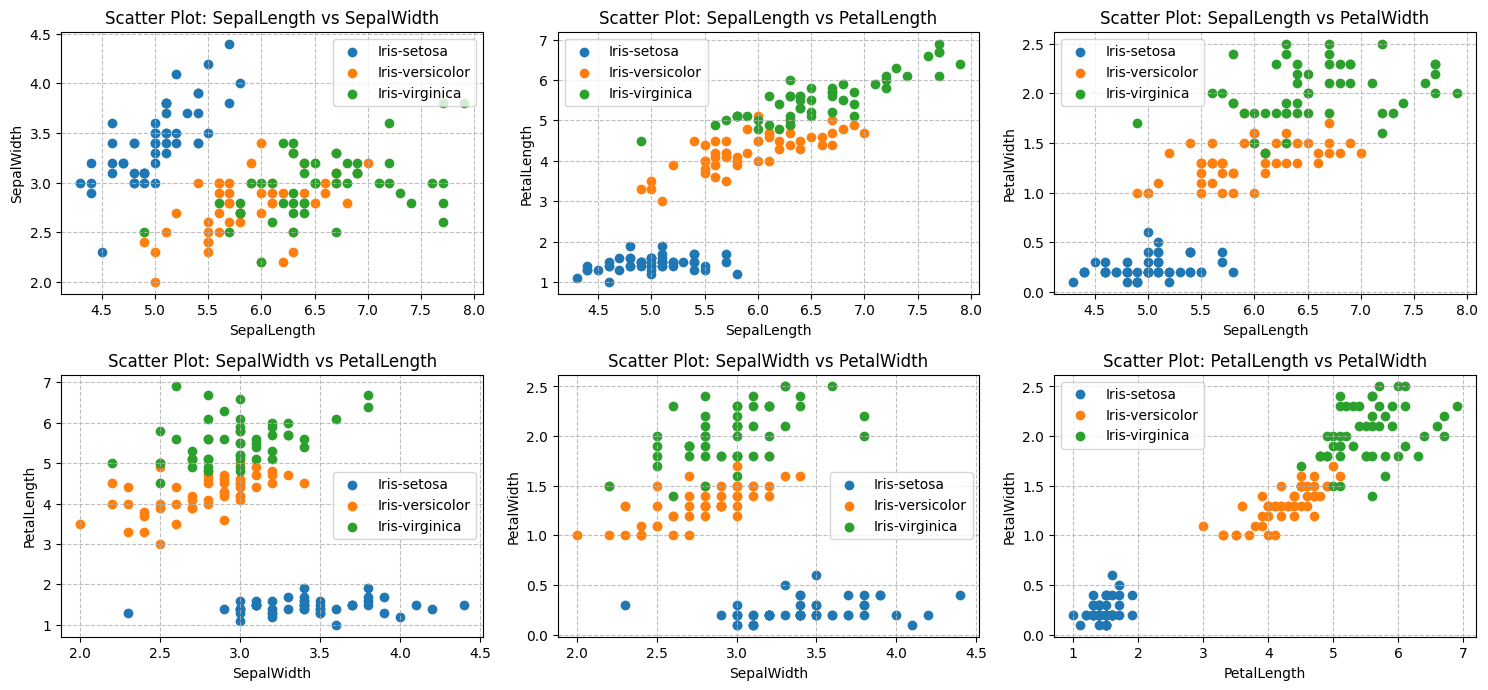

In [36]:
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
combinations = it.combinations(features, 2)
fig = plt.figure(figsize=(15, 10))
figure_index = 1
for combination in combinations:
    axs = fig.add_subplot(3, 3, figure_index)

    for name, group in iris.groupby('Name'):
        axs.scatter(group[combination[0]], group[combination[1]], label=name)

    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])
    axs.set_title(f'Scatter Plot: {combination[0]} vs {combination[1]}')
    axs.legend()
    axs.grid(True, linestyle='--', alpha=0.8)
    figure_index+=1


plt.tight_layout()
plt.show()

#Task 2.3. Apply StandardScaler to non-class attributes

In [ ]:
sc = StandardScaler()
iris.iloc[:, :-1] = sc.fit_transform(iris.iloc[:, :-1])
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica




---



#**Task 3**. With Titanic dataset

##Task 3.1. Load the Titanic dataset and show its detail (using **info()** function)

In [ ]:
titanic = pd.read_csv('titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Task 3.2. Which attributes have missing values? Plot missing percentages for these attributes.

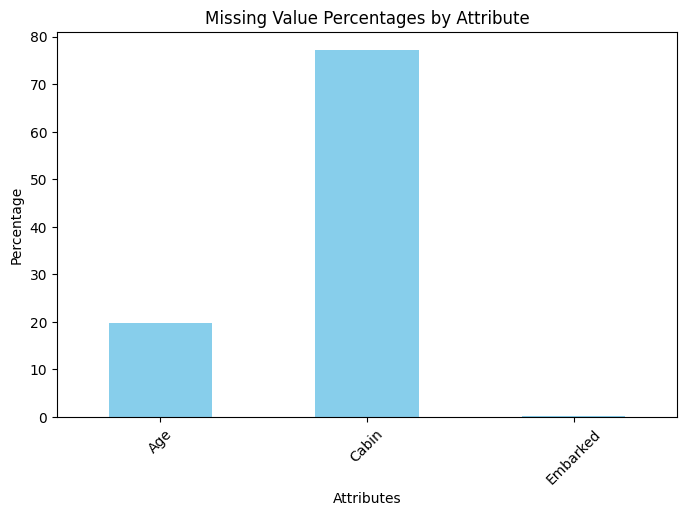

In [ ]:
missing_values = titanic.isnull().sum()
missing_attributes = missing_values[missing_values > 0]

if not missing_attributes.empty:
    missing_percentage = (missing_attributes / len(titanic)) * 100
    plt.figure(figsize=(8, 5))
    missing_percentage.plot(kind='bar', color='skyblue')
    plt.title('Missing Value Percentages by Attribute')
    plt.ylabel('Percentage')
    plt.xlabel('Attributes')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No attributes have missing values.")

#Task 3.3. Fill missing values for these attributes using **SimpleImputer** with approriate strategy (mean, median, most_frequent, constant)

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

for column in missing_attributes.index:
    if titanic[column].dtype in ['float64', 'int64']:
        titanic[column] = median_imputer.fit_transform(titanic[[column]])
    else:
        titanic[column] = most_frequent_imputer.fit_transform(titanic[[column]]).ravel()

titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Task 3.4. Discretize age values into **5 bins**. Then, plot the histogram of age to identify the most popular age interval.

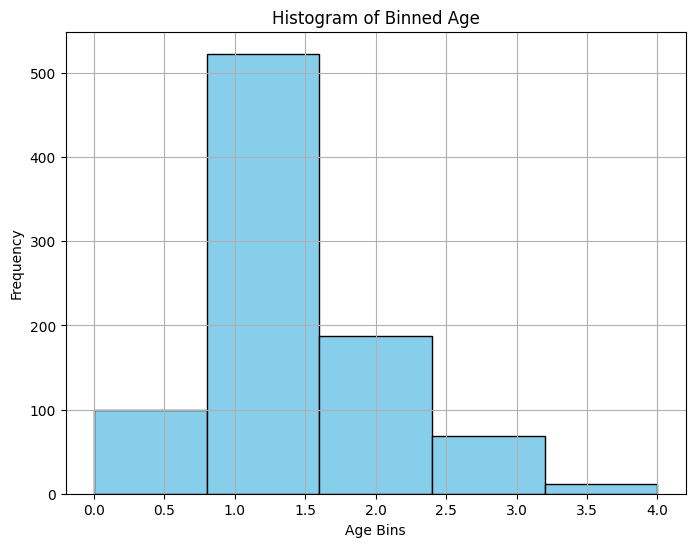

In [ ]:
titanic['Age_Binned'] = pd.cut(titanic['Age'], bins=5, labels=False)
plt.figure(figsize=(8, 6))
titanic['Age_Binned'].plot(kind='hist', bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Binned Age')
plt.xlabel('Age Bins')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Task 3.5. Convert sex values into numeric values using **dummy** approach

In [ ]:
dummies = get_dummies(titanic['Sex'], drop_first=True, dtype=int)
titanic = concat([titanic, dummies], axis=1)
titanic = titanic.drop(columns='Sex', axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Binned,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,S,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,B96 B98,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,B96 B98,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1,1
